# **Trends in posted Jobs on Indeed in the span of 01st Jul 2021 - 30th Sep 2021**

Importing Files and necessary libraries

In [2]:
import pandas as pd
import json
import zipfile

file_path = "/content/archive (4).zip"
# Initialize an empty list to store valid JSON objects
data = []

Unzipping the file and viewing the data

In [3]:
# Open the file and process line by line
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Get a list of files within the zip
    for file_name in zip_ref.namelist():
        # Open each file within the zip
        with zip_ref.open(file_name, 'r') as file:
            # Read the file content as text
            file_content = file.read().decode('utf-8', errors='ignore') # ignoring decoding errors
            # Try to load each line as JSON
            for line_number, line in enumerate(file_content.splitlines(), start=1):
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON on line {line_number} in file {file_name}: {e}")
# Convert list to DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())

Error decoding JSON on line 3893 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__20210701_20210930__30k_data.ldjson: Unterminated string starting at: line 1 column 2217 (char 2216)
Error decoding JSON on line 3894 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__20210701_20210930__30k_data.ldjson: Expecting value: line 1 column 1 (char 0)
Error decoding JSON on line 3895 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__20210701_20210930__30k_data.ldjson: Expecting value: line 1 column 1 (char 0)
Error decoding JSON on line 3896 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__20210701_20210930__30k_data.ldjson: Expecting value: line 1 column 1 (char 0)
Error decoding JSON on line 3897 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__20210701_20210930__30k_data.ldjson: Expecting value: line 1 column 1 (char 0)
Error decoding JSON on line 3898 in file marketing_sample_for_indeed_co_in-indeed_co_in_job_data__

Checking all the columns that can be used

In [4]:
print(df.columns)

Index(['uniq_id', 'crawl_timestamp', 'url', 'job_title', 'category',
       'company_name', 'city', 'state', 'country', 'post_date',
       'job_description', 'job_type', 'company_description', 'job_board',
       'geo', 'job_post_lang', 'html_job_description',
       'inferred_iso2_lang_code', 'is_remote', 'test1_cities', 'test1_states',
       'test1_countries', 'site_name', 'domain', 'postdate_yyyymmdd',
       'predicted_language', 'inferred_iso3_lang_code', 'test1_inferred_city',
       'test1_inferred_state', 'test1_inferred_country', 'inferred_state',
       'inferred_country', 'has_expired', 'last_expiry_check_date',
       'latest_expiry_check_date', 'dataset', 'postdate_in_indexname_format',
       'segment_name', 'duplicate_status', 'job_desc_char_count',
       'fitness_score', 'inferred_city', 'apply_url', 'logo_url',
       'test_contact_email', 'contact_email'],
      dtype='object')


Viewing data that I want to work with

In [21]:
print(df[['job_title', 'city', 'has_expired']].head(10))

                                           job_title       city has_expired
0                               Full Stack Developer     Remote       false
1                           Windows Helpdesk Advisor  Bengaluru       false
2  CB-WLS- Credit Support Specialist Iv- Operatio...  Bengaluru       false
3                        Sales Executive-South Delhi      Delhi       false
4                           Senior Software Engineer  Hinjewadi       false
5              Data & Analytics Tech - AWS - Manager  Bengaluru       false
6                                   Sr. SQA Engineer  Bengaluru       false
7                          R&D Analytics Module Lead      Noida       false
8           Sr. US IT Recruiter (Remote Opportunity)  Hyderabad       false
9  Copy of Senior Engineer_Data Engineering_Soura...    Gurgaon       false


Filtering the city to Pune and remote location

In [6]:
filtered_df = df[df['city'].isin(['Pune', 'Remote'])]
job_titles = filtered_df[['job_title','company_name']]
print(job_titles)

                                               job_title  \
0                                   Full Stack Developer   
22                                     Sr Java Developer   
24                            Talent Acquisition Partner   
31                                 Model Based Developer   
34     Deputy Manager_Assistant lead- ERP_MIS Analyst...   
...                                                  ...   
29939                           Maintenance-Technician I   
29955                           Senior Software Engineer   
29971                  Pre-primary Teacher, Pimpri, Pune   
29986        EDP Executive(Automobile),2-4 yr exp,Pune.4   
29990                              Field Sales Executive   

                                            company_name  
0                                                skilora  
22                                            TransUnion  
24                                               skilora  
31                                KPIT Tech

Job title v/s Count of Companies that offer the job

<ipython-input-7-56ee1e606df4>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


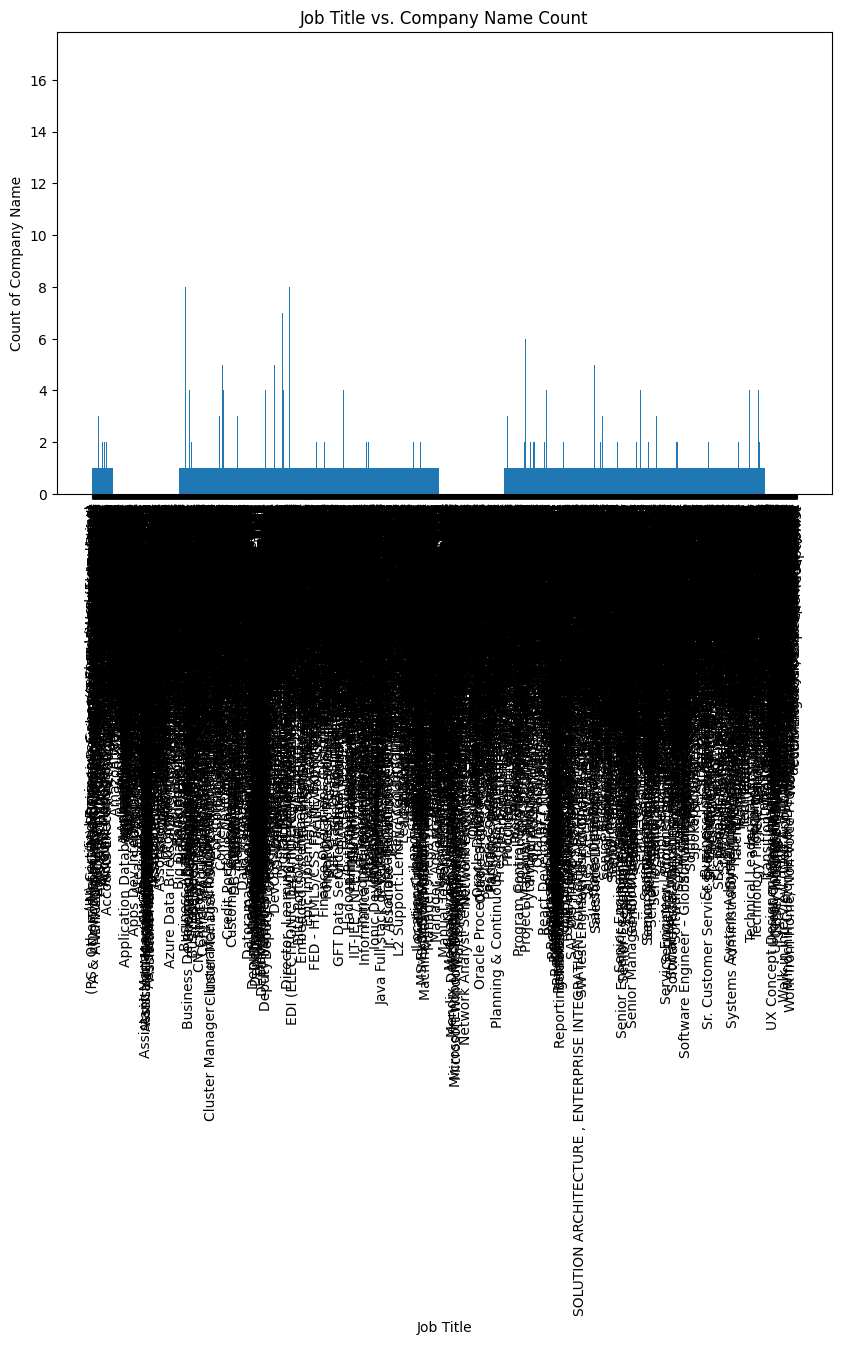

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'
# Group data by job title and count company names
job_title_counts = job_titles.groupby('job_title')['company_name'].count().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(job_title_counts['job_title'], job_title_counts['company_name'])
plt.xlabel("Job Title")
plt.ylabel("Count of Company Name")
plt.title("Job Title vs. Company Name Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Top 3 most In-demand jobs and Bottom 10 least offered jobs

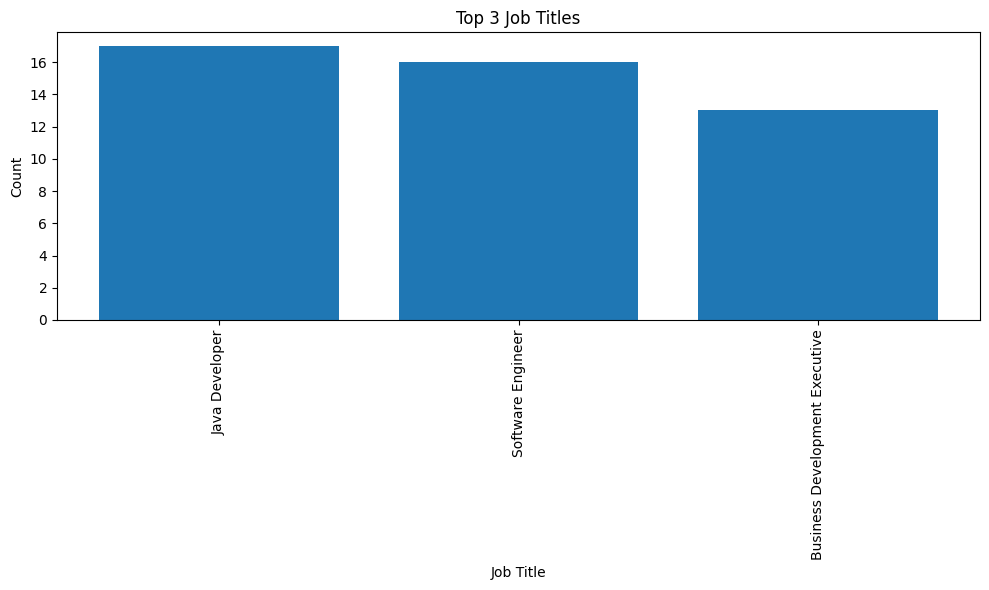

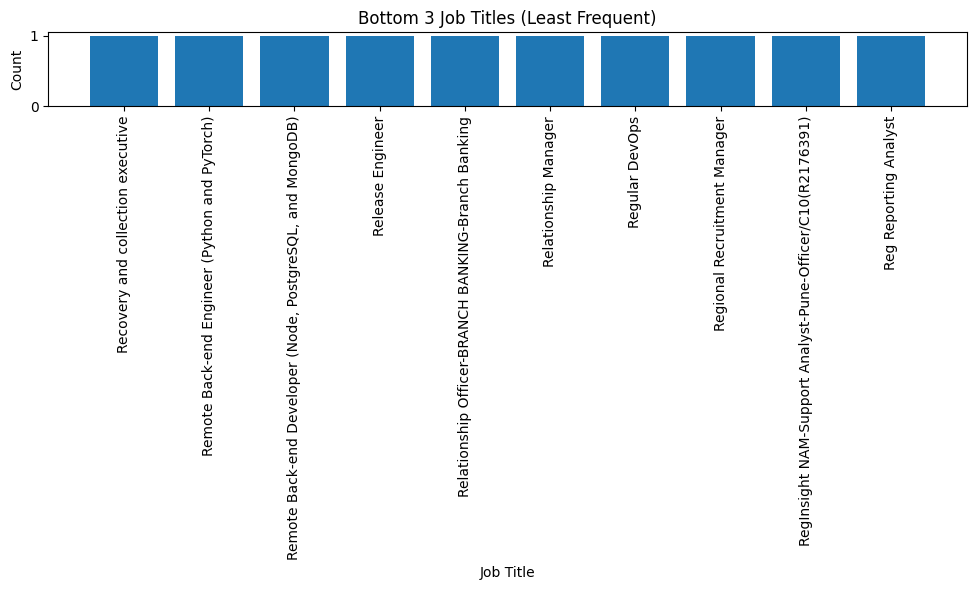

In [11]:
top_3_jobs = job_title_counts.sort_values(by=['company_name'], ascending=False).head(3)

# Sort by count in ascending order to get bottom job titles
bottom_3_jobs = job_title_counts.sort_values(by=['company_name'], ascending=True).head(10)

# Bar plot for top 3 job titles
plt.figure(figsize=(10, 6))
plt.bar(top_3_jobs['job_title'], top_3_jobs['company_name'])
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 3 Job Titles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar plot for bottom 3 job titles
plt.figure(figsize=(10, 6))
plt.bar(bottom_3_jobs['job_title'], bottom_3_jobs['company_name'])
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Bottom 10 Job Titles (Least Frequent)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Checking for expired job postings is the data set

In [22]:
expired_jobs = df[df['has_expired'] == True]
print(expired_jobs[['job_title', 'city', 'has_expired']])

Empty DataFrame
Columns: [job_title, city, has_expired]
Index: []


In [26]:
print(df[['job_title', 'city', 'has_expired']])

                                               job_title           city  \
0                                   Full Stack Developer         Remote   
1                               Windows Helpdesk Advisor      Bengaluru   
2      CB-WLS- Credit Support Specialist Iv- Operatio...      Bengaluru   
3                            Sales Executive-South Delhi          Delhi   
4                               Senior Software Engineer      Hinjewadi   
...                                                  ...            ...   
29990                              Field Sales Executive           Pune   
29991             Application Developer: Java Full Stack      Hyderabad   
29992                                        indian chef  Visakhapatnam   
29993                    Area Recovery Manager Auto Loan      Allahabad   
29994                                  Flutter Developer         Mohali   

      has_expired  
0           false  
1           false  
2           false  
3           false  

**Conclusion** - This dataset had already been cleaned for duplicate job postings, which may introduce a degree of bias.

Many job titles had slight variations—such as "Software Engineer" and "Remote Software Engineer"—making it challenging to accurately categorize job roles.

# Heatmap of job postings per day/week, all over India

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Convert 'post_date' to datetime objects
df['post_date'] = pd.to_datetime(df['post_date'])

# Extract day of the week and week number
df['day_of_week'] = df['post_date'].dt.day_name()
df['week_number'] = df['post_date'].dt.isocalendar().week

# Group by day of the week and week number, and count job postings
heatmap_data = df.groupby(['week_number', 'day_of_week'])['job_title'].count().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = heatmap_data.pivot(index='day_of_week', columns='week_number', values='job_title')

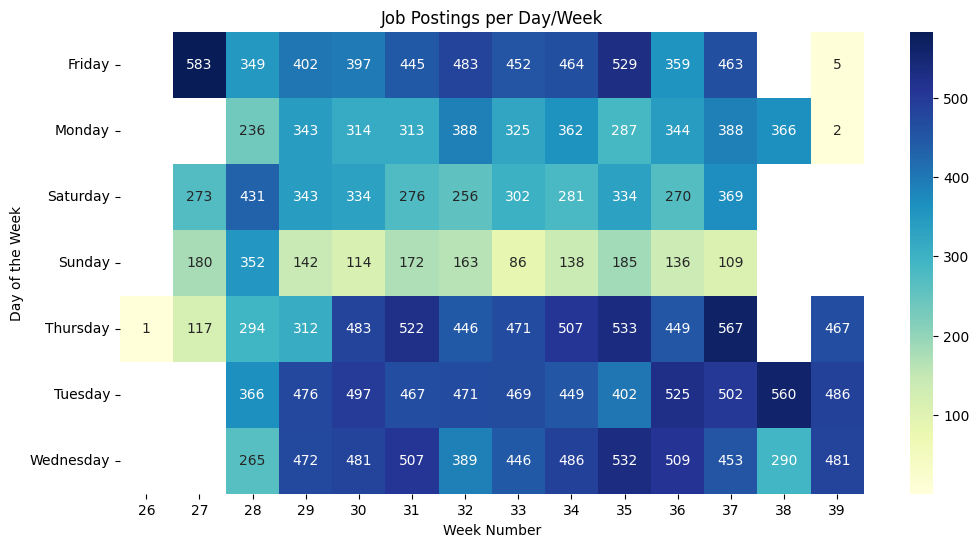

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")  # Changed fmt to '.0f'
plt.title('Job Postings per Day/Week')
plt.xlabel('Week Number')
plt.ylabel('Day of the Week')
plt.show()

In [33]:
weekday_counts = df.groupby('day_of_week')['job_title'].count().reset_index()
weekday_with_max_jobs = weekday_counts.loc[weekday_counts['job_title'].idxmax(), 'day_of_week']

print(f"The weekday with the maximum total jobs posted is: {weekday_with_max_jobs}")

The weekday with the maximum total jobs posted is: Tuesday


# **Extracting most commonly used words in Job descriptions using NLP**

In [38]:
!pip install nltk==3.8.1
!pip install wordcloud==1.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.1/473.1 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.4
    Uninstalling wordcloud-1.9.4:
      Successfully uninstalled wordcloud-1.9.4


In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
# Combine all job descriptions into a single string
all_job_descriptions = ' '.join(df['job_description'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(all_job_descriptions)

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w.lower() not in stop_words and w.isalnum()]

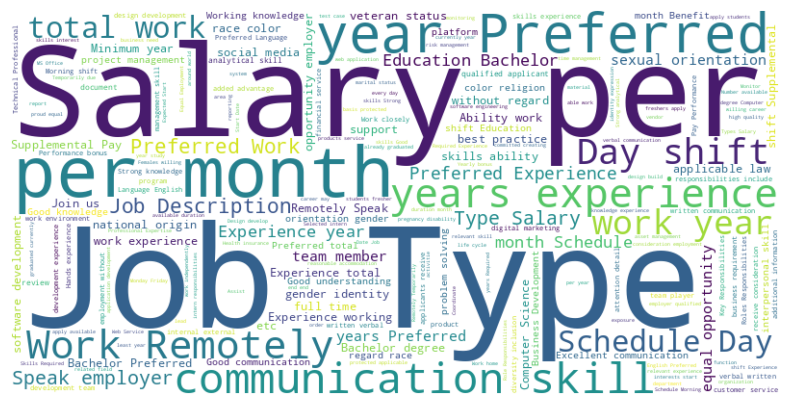

In [42]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion** - To filter job postings by specific skills, we need to define a list of target keywords, pass them as an array, and then identify and extract the entries in the dataset that contain any of those keywords within the job descriptions or titles.